In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
from mpl_toolkits.basemap import Basemap

In [2]:
%matplotlib inline

In [3]:
# Load Tim's data I pickled after some pre-processing
dfTimNomadV2=pd.read_pickle('dfTimNomadV2.p')

In [4]:
# quick look at his data
dfTimNomadV2.head()

,411,443,469,489,510,520,547,550,555,560,565,670,lat,lon,chl
0,0.002307,0.003225,0.004674,0.006265,0.007661,0.008944,0.012935,0.013410,0.014040,0.014715,0.015325,0.006588,38.4279,-76.61,38.19
1,0.002035,0.002650,0.003273,0.004149,0.004767,0.005416,0.007338,0.007570,0.007878,0.008208,0.008549,0.003241,38.3680,-76.50,35.01
2,0.001862,0.002271,0.002654,0.003523,0.004367,0.005147,0.007423,0.007691,0.008053,0.008434,0.008822,0.003084,38.3074,-76.44,26.91
3,0.002817,0.003330,0.004096,0.005482,0.006963,0.008243,0.012075,0.012525,0.013127,0.013770,0.014361,0.006154,38.6367,-76.32,47.96
4,0.001735,0.001959,0.002129,0.002882,0.003638,0.004115,0.005079,0.005191,0.005337,0.005507,0.005716,0.003423,38.3047,-76.44,23.55


In [5]:
dfTimNomadV2.describe(percentiles=[.025,.25,.5,.75,.975])

,411,443,469,489,510,520,547,550,555,560,565,670,lat,lon,chl
count,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000
mean,0.009913,0.009351,0.009408,0.009086,0.007638,0.007200,0.006301,0.006246,0.006105,0.005999,0.005913,0.001289,21.481930,-64.103323,1.544312
std,0.006548,0.005329,0.005020,0.004598,0.004656,0.004964,0.005866,0.005977,0.006091,0.006254,0.006359,0.002629,30.793904,62.277488,4.002408
min,0.000098,0.000365,0.000429,0.000546,0.000502,0.000463,0.000404,0.000410,0.000398,0.000374,0.000362,0.000023,-76.633000,-179.955000,0.000000
2.5%,0.001379,0.001807,0.002109,0.002710,0.002871,0.002967,0.002340,0.002247,0.002097,0.001937,0.001785,0.000073,-61.752887,-147.961150,0.000000
25%,0.005000,0.005335,0.005714,0.006135,0.005511,0.004927,0.003390,0.003257,0.003029,0.002801,0.002599,0.000196,22.893175,-118.275500,0.054000
50%,0.007967,0.008120,0.008610,0.008528,0.006562,0.005780,0.004292,0.004185,0.003970,0.003761,0.003624,0.000385,31.792500,-75.494750,0.301200
75%,0.013895,0.012699,0.012526,0.011118,0.007965,0.007237,0.006257,0.006207,0.006047,0.005934,0.005880,0.001101,36.829250,-54.195000,1.218750
97.5%,0.025597,0.021398,0.020731,0.020735,0.021671,0.022368,0.024289,0.024595,0.024675,0.024803,0.024970,0.008556,71.490175,132.489925,11.829550
max,0.039485,0.031489,0.042271,0.046573,0.050136,0.051616,0.057989,0.059072,0.060087,0.061543,0.062095,0.031832,79.000000,179.907000,72.120000


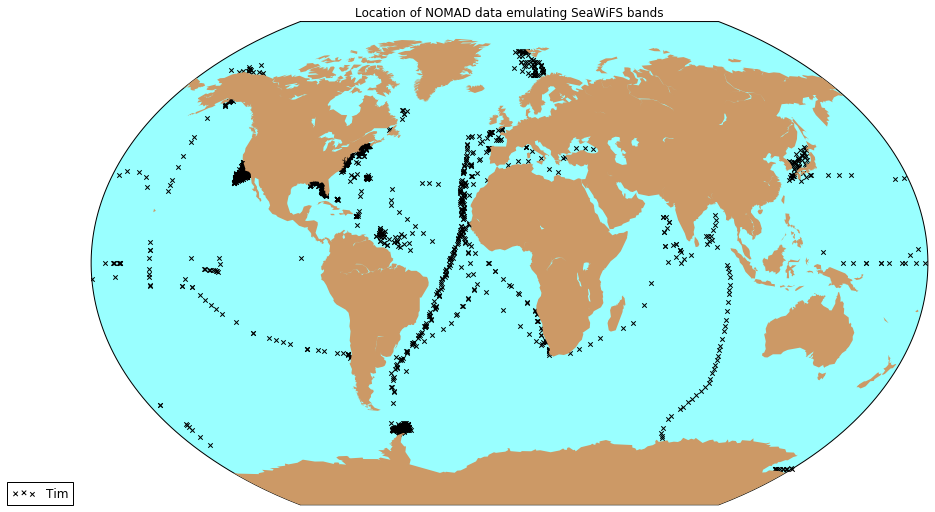

In [6]:
fig,ax=pl.subplots(figsize=(15,15))
m = Basemap(projection='kav7',lon_0=0,ax=ax)
xT,yT=m(dfTimNomadV2.lon.values,dfTimNomadV2.lat.values)
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966',lake_color='#99ffff')
m.scatter(xT,yT,20,marker='x',color='k',label='Tim')
pl.legend(loc=(-0.1,0))
pl.title('Location of NOMAD data emulating SeaWiFS bands');

In [ ]:
# Before getting fancy with FCM, let's try kmeans
from sklearn.cluster import KMeans

In [10]:
X = dfTimNomadV2[['411','443','489',
                     '510','555','670']].values
lons=dfTimNomadV2['lon'].values
lats=dfTimNomadV2['lat'].values

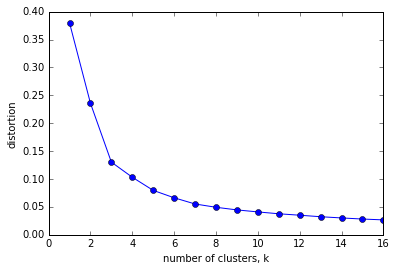

In [12]:
# We implement k-means so as to be able to use the results with the elbow method
distortions=[]
crange = range(1,17)
for i in crange:
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
    
pl.plot(crange,distortions,marker='o')
pl.xlabel('number of clusters, k')
pl.ylabel('distortion')

In [20]:
for i,ax in enumerate(axs.ravel()):
    print(i,end=" ")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 

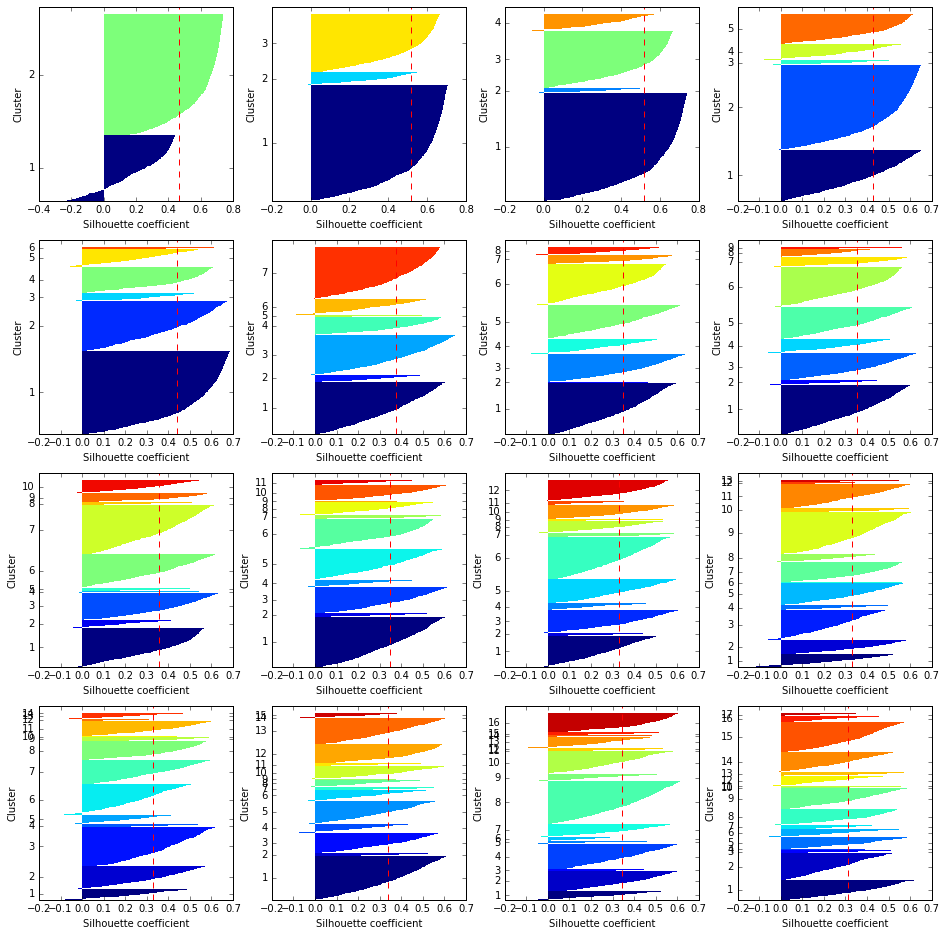

In [25]:
fig,axs = pl.subplots(nrows=4,ncols=4,figsize=(16,16))
for xclust,ax in enumerate(axs.ravel()):
    km = KMeans(n_clusters=xclust+2,init='k-means++',n_init=10,max_iter=300,tol=1e-4,random_state=0)
    y_km = km.fit_predict(X)
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X,y_km,metric='euclidean')
    y_ax_lower,y_ax_upper=0,0
    yticks=[]
    for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km==c]
        c_silhouette_vals.sort()
        y_ax_upper+= len(c_silhouette_vals)
        color=cm.jet(i/n_clusters)
        ax.barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals,height=1.0,
               edgecolor='none',color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)
    pl.yticks()
    silhouette_avg = np.mean(silhouette_vals)
    ax.axvline(silhouette_avg,color='red',linestyle='--')
    ax.yaxis.set_ticks(yticks)
    ax.yaxis.set_ticklabels(cluster_labels+1)
    ax.set_ylabel('Cluster')
    ax.set_xlabel('Silhouette coefficient');

In [35]:
from scipy.spatial.distance import cdist

def Xie_Beni(x,cntrs,mu_ij,m=2):
    """ implements the Xi-Beni validity function
    given n obs, m features, c centers
    X is data; dims:(n x m)
    cntrs is cluster centroid coordinates in feature space; dims (c x m)
    mu_ij is membership of obs j to cluster i; dims: (n x c)
    returns:
    s_i: ratio of compactness to separation; dims: (1xc)
    """
    # calculate cluster separation
    d = np.unique(np.square(cdist(cntrs,cntrs)))
    dmin = d[d>0].min() 
    bottom = x.shape[1] * dmin
    top =np.square(mu_ij) * np.square(cdist(cntrs,x))
    s_i =  top.sum()/bottom
    return s_i

def Davies_Bouldin(x,cntrs):
    pass

In [59]:
fpcs=[]
minCenters = 3
maxCenters = 17
owtd=dict.fromkeys(np.arange(minCenters,maxCenters))
cntrCoord = dict.fromkeys(np.arange(minCenters,maxCenters))
owtc = dict.fromkeys(np.arange(minCenters,maxCenters))
xbs=[]
for ncenters in range(minCenters,maxCenters):
    cntr,u,u0,d,jm,p,fpc=sf.cluster.cmeans(X.T,ncenters,2,error=0.005,maxiter=1000,init=None)
    fpcs.append(fpc)
    xb=Xie_Beni(X,cntr,u)
    xbs.append(xb)
    owtd[ncenters] = np.argmax(u,axis=0)
    cntrCoord[ncenters] = cntr
    owtc[ncenters] = u
    print('%d - FPC: %f | XB: %f' % (ncenters,fpc,xb))

3 - FPC: 0.754952 | XB: 59.916483
4 - FPC: 0.650777 | XB: 140.289674
5 - FPC: 0.624418 | XB: 84.714970
6 - FPC: 0.577457 | XB: 164.773560
7 - FPC: 0.537865 | XB: 189.274805
8 - FPC: 0.538953 | XB: 148.235026
9 - FPC: 0.503584 | XB: 186.166948
10 - FPC: 0.496988 | XB: 133.904094
11 - FPC: 0.475419 | XB: 192.129563
12 - FPC: 0.467142 | XB: 150.897048
13 - FPC: 0.443033 | XB: 247.657308
14 - FPC: 0.418043 | XB: 280.042456
15 - FPC: 0.406787 | XB: 253.528880
16 - FPC: 0.398715 | XB: 263.130103


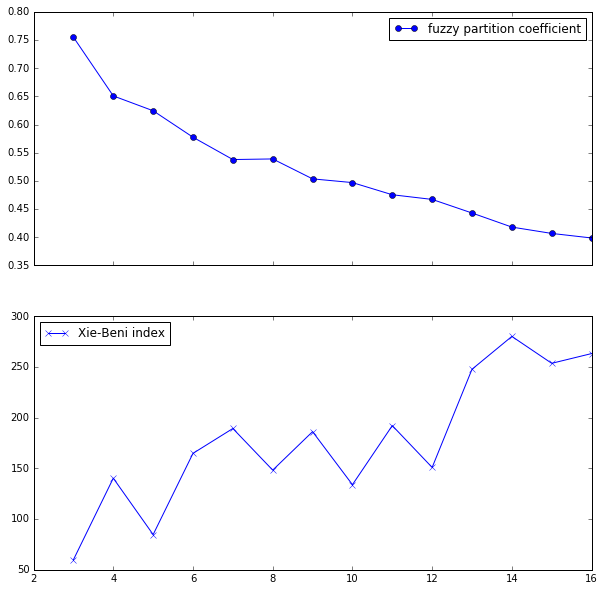

In [64]:
fig,ax=pl.subplots(nrows=2,figsize=(10,10),sharex=True)
ax[0].plot(range(minCenters,maxCenters),fpcs,marker='o',label='fuzzy partition coefficient')
ax[1].plot(range(minCenters,maxCenters),xbs,marker='x',label='Xie-Beni index')
ax[0].legend(loc='best')
ax[1].legend(loc='best');